In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
# drop the 'Id' column
train_ID = df_train['Id']
df_train.drop(labels="Id", axis=1, inplace=True)
df_train.shape

(1460, 80)

In [7]:
test_ID = df_test["Id"]
df_test.drop(labels="Id", axis=1, inplace=True)
df_test.shape

(1459, 79)

### Analysis on Target Variable

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

Text(0.5, 1.0, 'Sales Price Distribution')

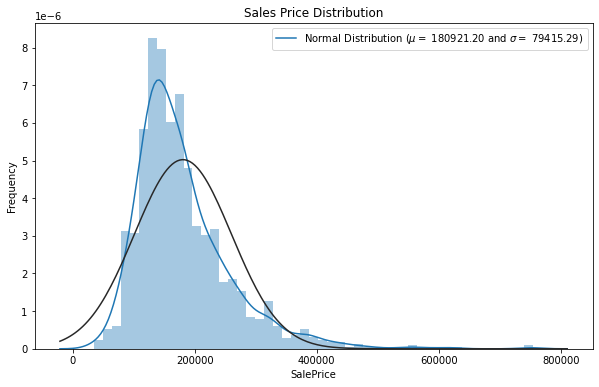

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df_train["SalePrice"], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])
plt.legend(['Normal Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')

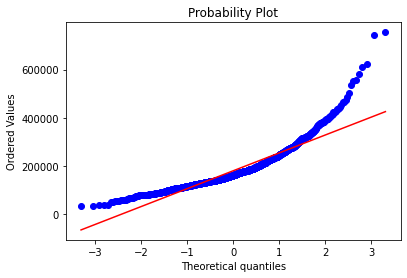

In [10]:
fig = plt.figure()
residual = stats.probplot(df_train["SalePrice"], plot=plt)
plt.show()

**Interpretation:** It is clear that our target variable is right skewed, so we need to Log transform this variable to make it Normal Distribution.

### Log Transformation

Text(0.5, 1.0, 'Sales Price Distribution')

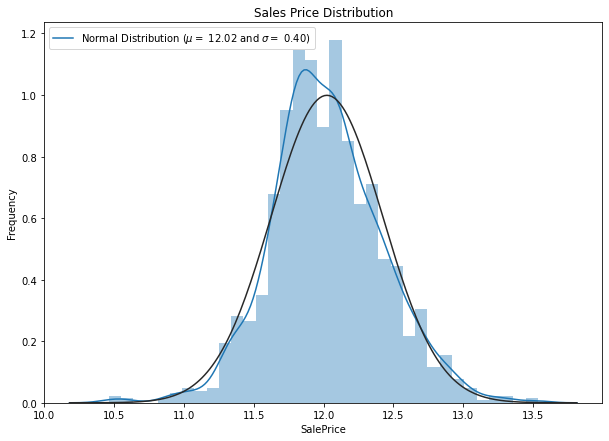

In [11]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

plt.figure(figsize=(10,7))
sns.distplot(df_train["SalePrice"], fit=norm)

(mu, sigma) = norm.fit(df_train['SalePrice'])
plt.legend(['Normal Distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Sales Price Distribution')

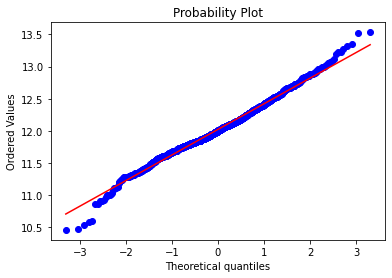

In [12]:
# QQ Plot
fig = plt.figure()
residual = stats.probplot(df_train["SalePrice"], plot=plt)
plt.show()

**Interpretation:** Now the data is Normally Distributed after Log Transformation.

In [13]:
# define our target variable as y
y = df_train["SalePrice"].values
y

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [14]:
#concatenate the train and test data
df_train_test = pd.concat((df_train, df_test)).reset_index(drop=True)
df_train_test.drop(["SalePrice"], axis=1, inplace=True)
print(df_train_test.shape)

(2919, 79)


In [15]:
#find out the missing data
df_train_test.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

In [16]:
#print missing data ratio sorted manner
missing_data_ratio = ((df_train_test.isnull().sum())/len(df_train_test))*100
missing_data_ratio = missing_data_ratio.drop(missing_data_ratio[missing_data_ratio==0].index).sort_values(ascending=False)[:30]
missing_data_ratio.head(30)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
GarageArea       0.034258
GarageCars       0.034258
Electrical       0.034258
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
dtype: float64

In [17]:
# filling missing values --> as per data description 'NA' defines, that perticuler feature is not present
## like --> for PoolQC 'NA' means "No Pool" / same for FireplaceQu 'NA' means "No fireplace" etc.
df_train_test['PoolQC'] = df_train_test['PoolQC'].fillna("None")
df_train_test['MiscFeature'] = df_train_test['MiscFeature'].fillna("None")
df_train_test['Alley'] = df_train_test['Alley'].fillna("None")
df_train_test['Fence'] = df_train_test['Fence'].fillna("None")
df_train_test['FireplaceQu'] = df_train_test['FireplaceQu'].fillna("None")

In [18]:
for g in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train_test[g] = df_train_test[g].fillna('None')

In [19]:
# Replacing missing data with 0. Since No garage so, no cars in such garage.
for g in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train_test[g] = df_train_test[g].fillna(0)

<AxesSubplot:xlabel='LotFrontage'>

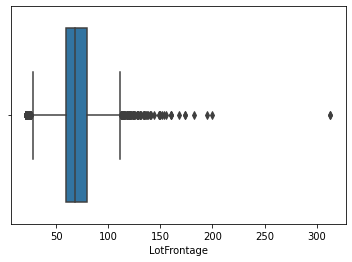

In [20]:
sns.boxplot(df_train_test['LotFrontage'])

In [21]:
df_train_test["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

**Note:** (LotFrontage)---> Area of each street connected to the house property most likely have a similar area to other houses in its neighborhood.

In [22]:
# As per above note, we can fill in missing values by the median LotFrontage of the neighborhood
df_train_test["LotFrontage"] = df_train_test.groupby("Neighborhood")["LotFrontage"].transform(lambda l: l.fillna(l.median()))

In [23]:
df_train_test["FireplaceQu"].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [24]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train_test[i] = df_train_test[i].fillna(0)

In [25]:
for b in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train_test[b] = df_train_test[b].fillna('None')

In [26]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_train_test["MasVnrType"] = df_train_test["MasVnrType"].fillna("None")
df_train_test["MasVnrArea"] = df_train_test["MasVnrArea"].fillna(0)

In [27]:
df_train_test['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [28]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value, so we can consider imputing the missing values with 'RL'
df_train_test['MSZoning'] = df_train_test['MSZoning'].fillna(df_train_test['MSZoning'].mode()[0])

In [29]:
df_train_test['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [30]:
df_train_test["Functional"] = df_train_test["Functional"].fillna("Typ")

In [31]:
df_train_test['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [32]:
df_train_test['Electrical'] = df_train_test['Electrical'].fillna(df_train_test['Electrical'].mode()[0])

In [33]:
df_train_test['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [34]:
df_train_test['KitchenQual'] = df_train_test['KitchenQual'].fillna(df_train_test['KitchenQual'].mode()[0])

In [35]:
df_train_test['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64